# data link : 'https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset/data'

In [3]:
# Manpulate
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
import joblib # save model

### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

In [4]:
# understand columns
df = pd.read_csv("emails.csv")
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
df.iloc[0, :]['text']

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [6]:
# b) check dtype -> df[col].astype()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


### 2) EDA

<Axes: xlabel='spam', ylabel='count'>

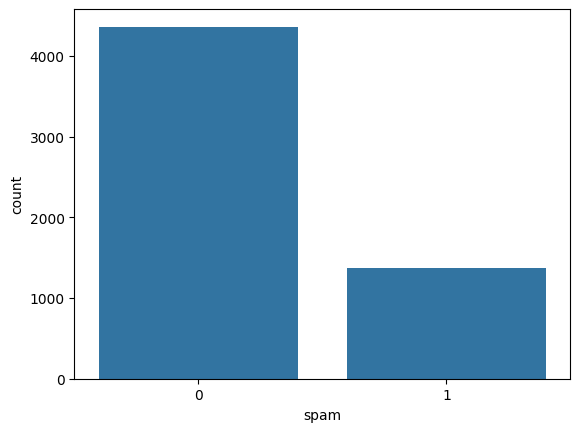

In [7]:
# univariate
sns.countplot(x=df['spam'])

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Imbalanced: X_train_resampled
* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [8]:
# a) Detect & Handle Duplicates
df.duplicated().sum()

33

In [9]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)


In [10]:
# b) train_test_split
X = df['text']
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4556,), (1139,), (4556,), (1139,))

In [11]:
# c) Detect & Handle NaNs
# d) Detect & Handle Outliers
X_train.isna().sum()

0

In [12]:
# e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(encoding='utf-8', lowercase=True, analyzer='word', stop_words='english', ngram_range=(1, 1), norm='l2')

data = tfidf_vectorizer.fit_transform(X_train)
X_train_preprocessed = pd.DataFrame(data.todense(), columns=tfidf_vectorizer.get_feature_names_out())

data = tfidf_vectorizer.transform(X_test)
X_test_preprocessed = pd.DataFrame(data.todense(), columns=tfidf_vectorizer.get_feature_names_out())
X_train_preprocessed

,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005168,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_train_preprocessed.shape

(4556, 33396)

### Modeling:

* 1) Simple Model

* 2) Underfit / Overfit

* 3) GridSearch

* 4) Precision Recall Curve => Threshold

* 5) Test Perfomance

* 6) save model

## 1) Simple Model

In [14]:
# 1) Simple Model
from sklearn.linear_model import LogisticRegression

logestic_clf = LogisticRegression(C=1, class_weight='balanced', max_iter=100, random_state=42)
logestic_clf.fit(X_train_preprocessed, y_train)

LogisticRegression(C=1, class_weight='balanced', random_state=42)

In [15]:
# Performance: Valid
from sklearn.model_selection import cross_val_score, cross_val_predict

print(f"Train Accuracy: {logestic_clf.score(X_train_preprocessed, y_train)}")

val_scores = cross_val_score(logestic_clf, X_train_preprocessed, y_train, cv=5)
print(f"Valid Accuracy: {np.mean(val_scores)})")

Train Accuracy: 0.9940737489025461
Valid Accuracy: 0.9855145203843858)


In [16]:
# metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_valid_pred = cross_val_predict(logestic_clf, X_train_preprocessed, y_train, cv=3)
print(f"Valid Precision: {precision_score(y_train, y_valid_pred)}")
print(f"Valid recall: {recall_score(y_train, y_valid_pred)}")
print(f"Valid f1: {f1_score(y_train, y_valid_pred)}")
confusion_matrix(y_train, y_valid_pred)

Valid Precision: 0.9429065743944637
Valid recall: 0.9963436928702011
Valid f1: 0.9688888888888889


array([[3396,   66],
       [   4, 1090]], dtype=int64)

## KNeighborsClassifier

In [17]:
# 2) Underfit / Overfit
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn_clf.fit(X_train_preprocessed, y_train)

KNeighborsClassifier(metric='cosine')

In [18]:
# Performance: Valid

print(f"Train Accuracy: {knn_clf.score(X_train_preprocessed, y_train)}")

val_scores = cross_val_score(knn_clf, X_train_preprocessed, y_train, cv=5)
print(f"Valid Accuracy: {np.mean(val_scores)})")
# metrics

y_valid_pred = cross_val_predict(knn_clf, X_train_preprocessed, y_train, cv=3)
print(f"Valid Precision: {precision_score(y_train, y_valid_pred)}")
print(f"Valid recall: {recall_score(y_train, y_valid_pred)}")
print(f"Valid f1: {f1_score(y_train, y_valid_pred)}")
confusion_matrix(y_train, y_valid_pred)

Train Accuracy: 0.9863915715539947
Valid Accuracy: 0.9754164500163691)
Valid Precision: 0.9727626459143969
Valid recall: 0.9140767824497258
Valid f1: 0.942507068803016


array([[3434,   28],
       [  94, 1000]], dtype=int64)

### 4) Precision Recall Curve => Threshold


In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

y_logestic_valid_df = cross_val_predict(logestic_clf, X_train_preprocessed, y_train, cv=3, method='decision_function')
logestic_precisison_scores, logestic_recall_scores, logestic_threshold_scores= precision_recall_curve(y_train, y_logestic_valid_df)

y_knn_valid_df = cross_val_predict(knn_clf, X_train_preprocessed, y_train, cv=3, method='predict_proba')
knn_precisison_scores, knn_recall_scores, knn_threshold_scores= precision_recall_curve(y_train, y_knn_valid_df[:, 1])


plt.plot(logestic_recall_scores[:-1], logestic_precisison_scores[:-1], c='red', label='logestic PR')
plt.plot(knn_recall_scores[:-1], knn_precisison_scores[:-1], c='green', label='knn PR')
plt.title("PR Cruve")
plt.xlabel("Recall")
plt.ylabel("Precsision")
plt.legend()
plt.show()

# logestic model is a bit batter than knn 

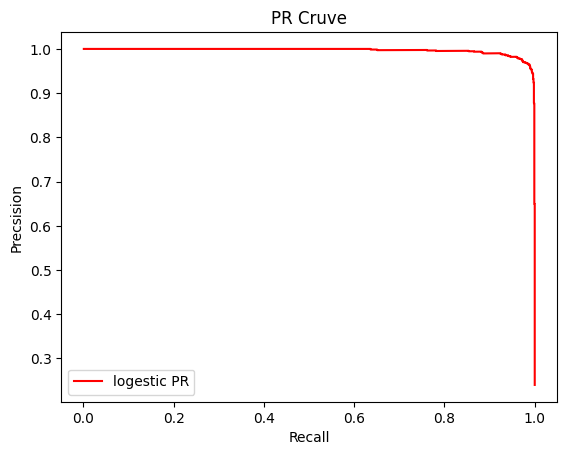

In [ ]:
plt.plot(logestic_recall_scores[:-1], logestic_precisison_scores[:-1], c='red', label='logestic PR')
plt.title("PR Cruve")
plt.xlabel("Recall")
plt.ylabel("Precsision")
plt.legend()
plt.show()

In [ ]:
# precisison 99%
ind_p99 = np.argmax(logestic_precisison_scores >= 0.9899) #0.01 0.1 0.9 0.99 1
threshold_p99 = logestic_threshold_scores[ind_p99]
logestic_threshold_scores[ind_p99], logestic_precisison_scores[ind_p99], logestic_recall_scores[ind_p99]

(0.6161768062348605, 0.990205680705191, 0.9241316270566727)

In [ ]:
# predictions after applying threshold (99% presison, 92.5%)
from sklearn.metrics import accuracy_score
y_valid_scores = cross_val_predict(logestic_clf, X_train_preprocessed, y_train, cv=3, method='decision_function')

y_valid_pred = (y_valid_scores >= threshold_p99)
print(f"Valid Accuracy: {accuracy_score(y_train, y_valid_pred)})")

print(f"Valid Precision: {precision_score(y_train, y_valid_pred)}")
print(f"Valid recall: {recall_score(y_train, y_valid_pred)}")
print(f"Valid f1: {f1_score(y_train, y_valid_pred)}")
confusion_matrix(y_train, y_valid_pred)

Valid Accuracy: 0.9795873573309921)
Valid Precision: 0.990205680705191
Valid recall: 0.9241316270566727
Valid f1: 0.9560283687943263


array([[3452,   10],
       [  83, 1011]], dtype=int64)

#### 5) Test Prefromance

In [ ]:
y_test_scores = logestic_clf.decision_function(X_test_preprocessed)
y_test_pred = (y_test_scores >= threshold_p99)
print(f"test Accuracy: {accuracy_score(y_test, y_test_pred)})")

print(f"test Precision: {precision_score(y_test, y_test_pred)}")
print(f"test recall: {recall_score(y_test, y_test_pred)}")
print(f"test f1: {f1_score(y_test, y_test_pred)}")
confusion_matrix(y_test, y_test_pred)

test Accuracy: 0.9929762949956101)
test Precision: 0.9925925925925926
test recall: 0.9781021897810219
test f1: 0.9852941176470589


array([[863,   2],
       [  6, 268]], dtype=int64)

### 6) Save Model

In [ ]:
logestic_pipe = Pipeline([
    ('tf_idf', tfidf_vectorizer),
    ('model', logestic_clf),
])
logestic_pipe

Pipeline(steps=[('tf_idf', TfidfVectorizer(stop_words='english')),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=42))])

In [ ]:
import joblib
joblib.dump(logestic_pipe, 'best_spam_detector.pkl')

['best_spam_detector.pkl']